In [2]:
print('hello')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


hello


In [24]:
cv19 = pd.read_csv("/covid19.csv")
cv19


,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
0,0,NaN,Afghanistan,1/22/2020,33.000000,65.000000,0,0,0
1,1,NaN,Albania,1/22/2020,41.153300,20.168300,0,0,0
2,2,NaN,Algeria,1/22/2020,28.033900,1.659600,0,0,0
3,3,NaN,Andorra,1/22/2020,42.506300,1.521800,0,0,0
4,4,NaN,Angola,1/22/2020,-11.202700,17.873900,0,0,0
...,...,...,...,...,...,...,...,...,...
37039,37039,NaN,Sao Tome and Principe,6/16/2020,0.186360,6.613081,671,12,182
37040,37040,NaN,Yemen,6/16/2020,15.552727,48.516388,885,214,91
37041,37041,NaN,Comoros,6/16/2020,-11.645500,43.333300,197,3,127
37042,37042,NaN,Tajikistan,6/16/2020,38.861034,71.276093,5160,50,3624


In [60]:
print(cv19["confirmed"].sum())
print(cv19["deaths"].sum())
print(cv19["recoveries"].sum())

329135580
20540202
124277666


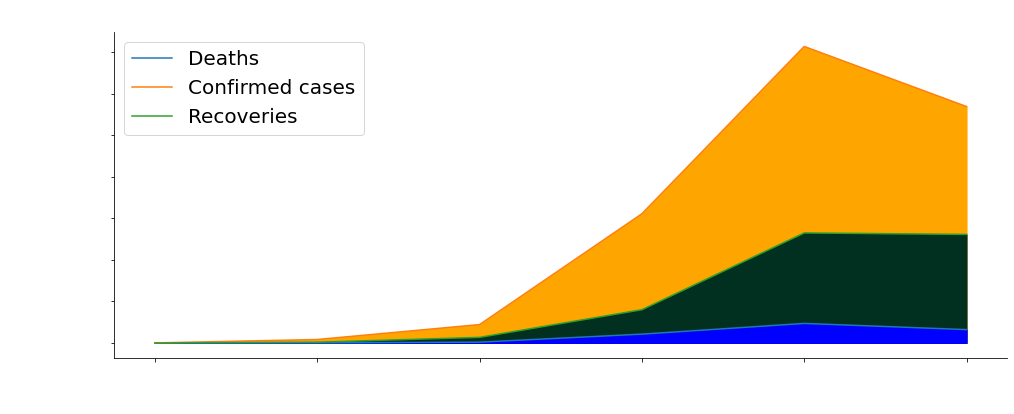

In [14]:
cv19['date'] = cv19['date'].str[:1]
date = cv19.loc[:, ['date', 'deaths']].groupby('date', as_index=False).sum('deaths')
date['deaths'] =(date['deaths']/1000)
#deaths
confir = cv19.loc[:, ['date', 'confirmed']].groupby('date', as_index=False).sum('confirmed')
confir['confirmed'] =(confir['confirmed']/1000)
confir
#confirmed cases
reco = cv19.loc[:, ['date', 'recoveries']].groupby('date', as_index=False).sum('recoveries')
reco['recoveries'] =(reco['recoveries']/1000)

MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(MONTHS, date['deaths'])
plt.plot(MONTHS, confir['confirmed'])
plt.plot(MONTHS, reco['recoveries'])
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.title('Amount of deaths/recoveries/confirmed cases', fontsize=24, color='#FFFFFF') 
plt.xlabel('Months', fontsize=20, color='#FFFFFF')
plt.xticks(fontsize=20, color="#FFFFFF")
plt.yticks(fontsize=20, color="#FFFFFF")
plt.ylabel('Amount (Thousand)', fontsize=20, color='#FFFFFF')
plt.legend(['Deaths', 'Confirmed cases', 'Recoveries'], fontsize=20)

plt.fill_between(MONTHS, confir['confirmed'], color="#FFA500")
plt.fill_between(MONTHS, reco['recoveries'] , color="#023020")
plt.fill_between(MONTHS, date['deaths'] , color="#0000FF")

# plt.fill_between(MONTHS, )

plt.show()

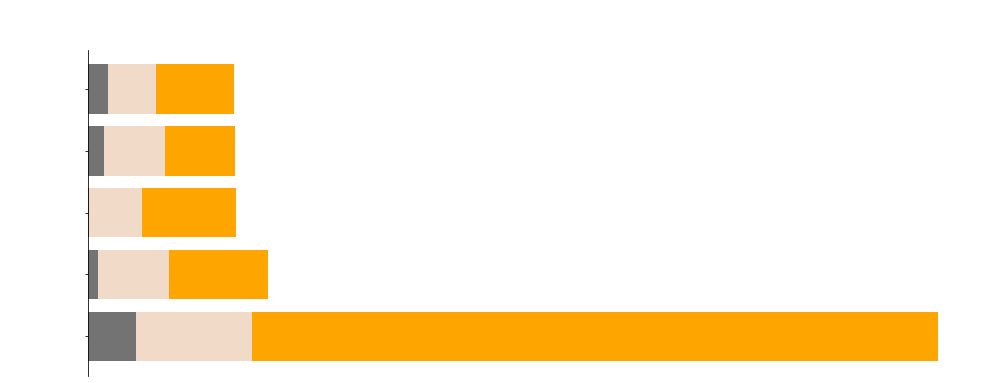

In [109]:

country = cv19.loc[:, ['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region', as_index=False).sum()
top5 = country.sort_values(by="confirmed", ascending=False).head()
top5
fig, ax = plt.subplots(figsize=(16, 6))
plt.barh(top5["Country/Region"], top5["confirmed"], color="#FFA500")
plt.barh(top5["Country/Region"], top5["recoveries"], color='#f1dbc8')
plt.barh(top5["Country/Region"], top5["deaths"], color='#737373')

plt.suptitle('Top 5 countries with highest number of cases', fontsize=24, color='#FFFFFF', x=0.125, ha='left') 
plt.ylabel('Countries (From lowest to highest)', fontsize=18, color='#FFFFFF')
plt.xticks([])
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
ax.spines['right'].set_visible(False) 
plt.yticks(fontsize=16, color="#FFFFFF")
plt.show()

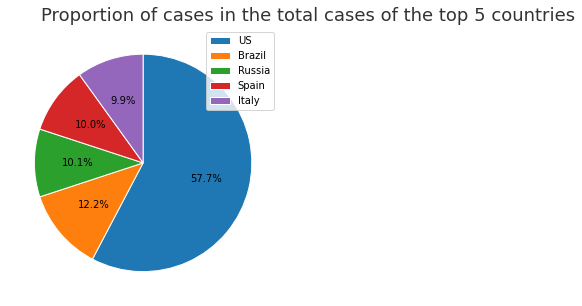

In [136]:
country = cv19.loc[:, ['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region', as_index=False).sum()
top5 = country.sort_values(by="confirmed", ascending=False).head()
fig, ax = plt.subplots(figsize=(16 , 5))
plt.pie(top5['confirmed'], autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'w', 'linewidth': 1})
plt.title('Proportion of cases in the total cases of the top 5 countries', fontsize=18, color='#333333', x=0.125, ha='left')
plt.legend(top5["Country/Region"]) 
plt.show()

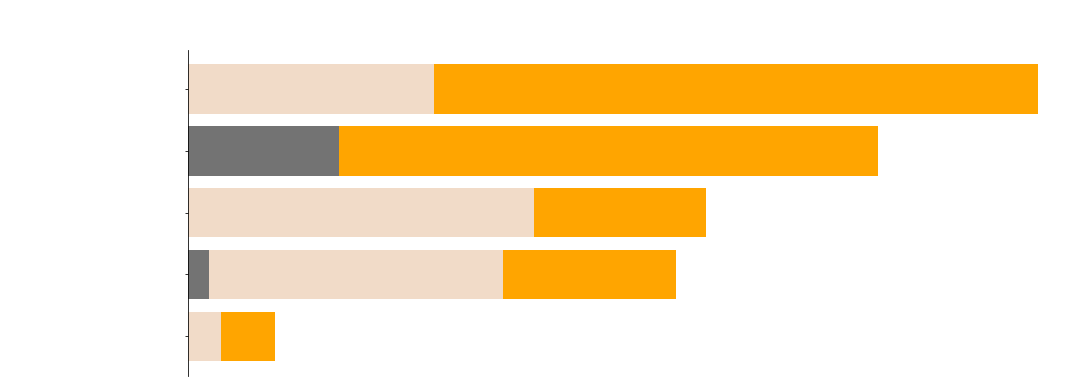

In [9]:
country = cv19.loc[:, ['Country/Region', 'confirmed','deaths','recoveries']].groupby('Country/Region', as_index=False).sum()
top5 = country.sort_values(by="confirmed", ascending=True).head()
top5
fig, ax = plt.subplots(figsize=(16, 6))
plt.barh(top5["Country/Region"], top5["confirmed"], color="#FFA500")
plt.barh(top5["Country/Region"], top5["recoveries"], color='#f1dbc8')
plt.barh(top5["Country/Region"], top5["deaths"], color='#737373')

plt.suptitle('Top 5 countries with lowest number of cases', fontsize=24, color='#FFFFFF', x=0.125, ha='left') 
plt.ylabel('Countries (From highest to lowest)', fontsize=18, color='#FFFFFF')
plt.xticks([])
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
ax.spines['right'].set_visible(False) 
plt.yticks(fontsize=16, color="#FFFFFF")
plt.show()



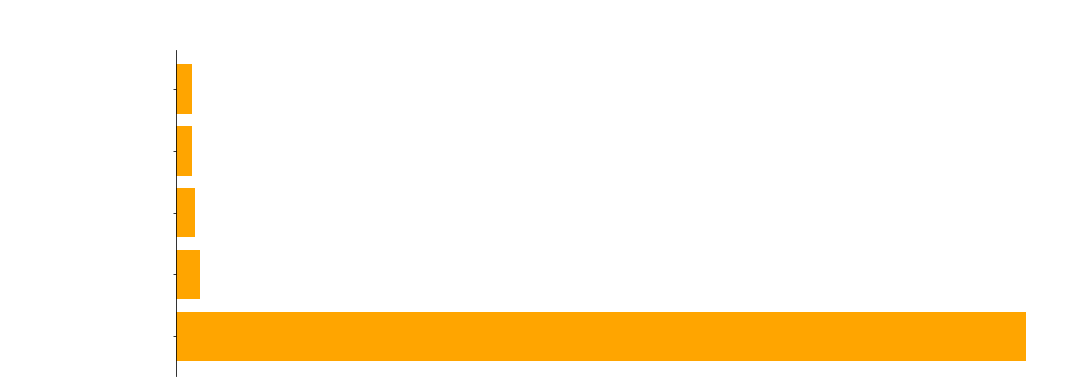

In [36]:
Pro = cv19[cv19['Province/State'].str.contains('NaN') == False].loc[:, ['Province/State', 'confirmed']].groupby('Province/State', as_index=False)['confirmed'].sum()
Final = Pro.sort_values(by="confirmed", ascending=False).head()
fig, ax = plt.subplots(figsize=(16, 6))
plt.barh(Final["Province/State"],Final["confirmed"] , color="#FFA500")

plt.suptitle('Top 5 Province/State with highest number of confirmed cases', fontsize=24, color='#FFFFFF', x=0.125, ha='left') 
plt.ylabel('Countries (From highest to lowest)', fontsize=18, color='#FFFFFF')
plt.xticks([])
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
ax.spines['right'].set_visible(False) 
plt.yticks(fontsize=16, color="#FFFFFF")
plt.show()

In [52]:
Pro = cv19[cv19['Province/State'].str.contains('NaN') == False]
Final = Pro.loc[:, ['Province/State', 'confirmed']].groupby('Province/State', as_index=False)['confirmed'].sum().sort_values(by="confirmed", ascending=False).head()
print(Pro[Pro['Province/State'] == 'Hubei'])
print(Pro[Pro['Province/State'] == 'Zhejiang'])
print(Pro[Pro['Province/State'] == 'Henan'])
print(Pro[Pro['Province/State'] == 'Guangdong'])
print(Pro[Pro['Province/State'] == 'New South Wales'])

       Unnamed: 0 Province/State Country/Region       date      Lat      Long  \
51             51          Hubei          China  1/22/2020  30.9756  112.2707   
303           303          Hubei          China  1/23/2020  30.9756  112.2707   
555           555          Hubei          China  1/24/2020  30.9756  112.2707   
807           807          Hubei          China  1/25/2020  30.9756  112.2707   
1059         1059          Hubei          China  1/26/2020  30.9756  112.2707   
...           ...            ...            ...        ...      ...       ...   
35835       35835          Hubei          China  6/12/2020  30.9756  112.2707   
36087       36087          Hubei          China  6/13/2020  30.9756  112.2707   
36339       36339          Hubei          China  6/14/2020  30.9756  112.2707   
36591       36591          Hubei          China  6/15/2020  30.9756  112.2707   
36843       36843          Hubei          China  6/16/2020  30.9756  112.2707   

       confirmed  deaths  r